# Preprocessing the data

In [10]:
# Readthe csv data and crate the dataframe
from pathlib import Path
import pandas as pd

path = Path("Resources/combined_data.csv")
df = pd.read_csv(path, index_col='Year')
df.dropna(inplace=True)

In [11]:
# slice features and target
x = df.drop(columns=['Fraud Reporting Count', 'Quarter','Lagged Net Operating Income(Billions)'])
y = df["Fraud Reporting Count"].values.reshape(-1, 1)
display(x.head())
display(y[:5])

,Net Operating Income(Billions),Lagged Fraud Reporting Count
Year,,
2014,39.8,82364.0
2014,38.1,95516.0
2014,36.0,94084.0
2015,39.0,90868.0
2015,42.6,90566.0


array([[95516],
       [94084],
       [90868],
       [90566],
       [96365]])

In [12]:
#Slicing data into train and test subsets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, shuffle = False,random_state=1)

In [13]:
from sklearn.preprocessing  import StandardScaler

#Scaling x data
x_scaler = StandardScaler().fit(x_train)
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

#Scaling y data
y_scaler = StandardScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Decision Tree Model

#### Training

In [14]:
#Train the decisin tree model
from sklearn import tree
model = tree.DecisionTreeRegressor(max_depth = 4, random_state=1)
model = model.fit(x_train_scaled, y_train_scaled)

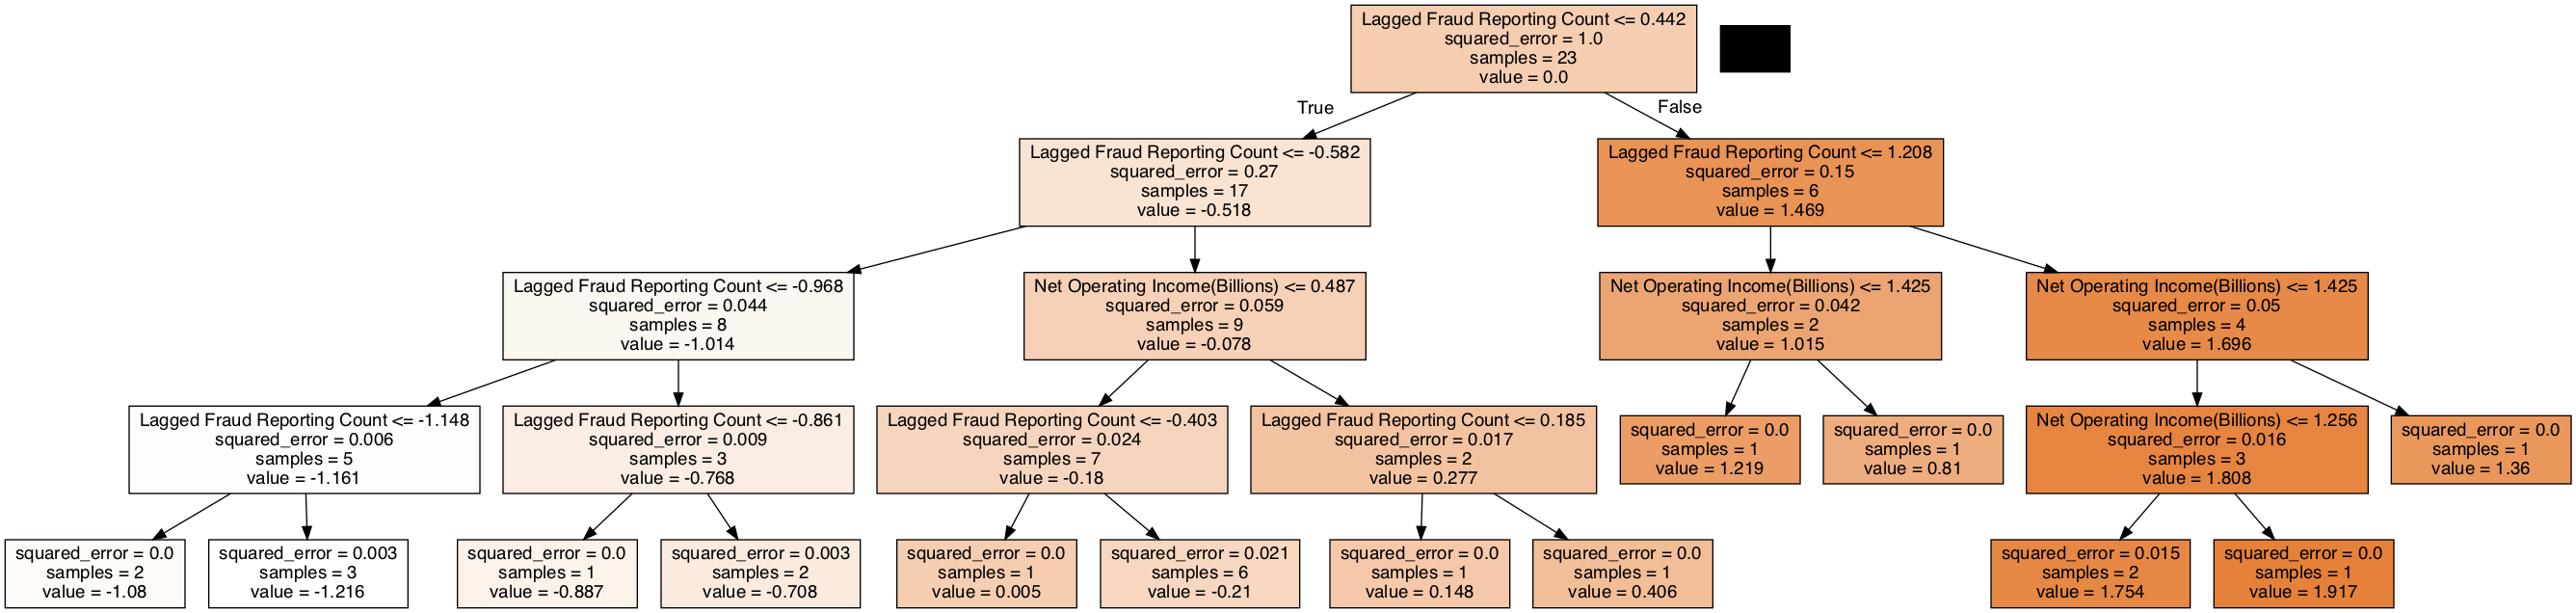

In [15]:
#Visualizing the Decision Tree Model
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(model, out_file=None, feature_names=x.columns, class_names=["0", "1"], filled=True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [16]:
#Perform the prediciton
import numpy as np
y_pred = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)
concatenated = np.concatenate((y_pred_train, y_pred))
y_predicted = y_scaler.inverse_transform(concatenated.reshape(-1,1))

#### Results

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

#Displaying Metrics
print(f'The Mean Squared Error is: {mean_squared_error(df["Fraud Reporting Count"], y_predicted)}')
display(f'The R squared is: {r2_score(df["Fraud Reporting Count"], y_predicted)}')


The Mean Squared Error is: 884329344.6290323


'The R squared is: 0.656673881135426'

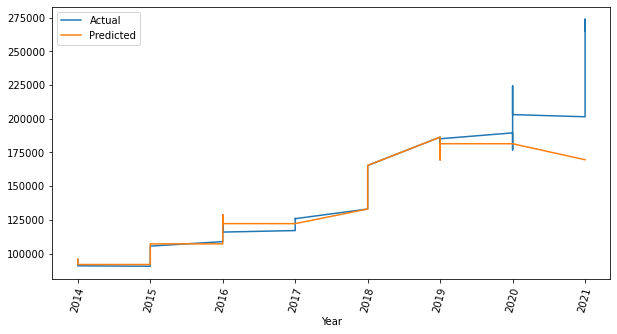

In [20]:
results = pd.DataFrame({
    "Actual":df["Fraud Reporting Count"],
    "Predicted":y_predicted.ravel()
})
results_plot = results.plot(rot = 75,figsize=(10,5))
fig = results_plot.get_figure()
fig.savefig('Resources/Images/HakobDTOutputPlot.png',format='png')